In [1]:
import torch

In [2]:
class term():
    joint_ids = ['FL_hip_joint', 'FR_hip_joint', 'RL_hip_joint', 'RR_hip_joint', 'FL_thigh_joint', 'FR_thigh_joint', 'RL_thigh_joint', 'RR_thigh_joint', 'FL_calf_joint', 'FR_calf_joint', 'RL_calf_joint', 'RR_calf_joint']#['RR_hip', 'RR_joint', 'RR_calf']
    num_envs = 64
    _num_legs = 4
    _prevision_horizon = 10

    def __init__(self):
        self._num_joints = len(self.joint_ids)
        self.f = torch.zeros(self.num_envs, self._num_legs)
        self.d = torch.zeros(self.num_envs, self._num_legs)
        self.p = torch.zeros(self.num_envs, self._num_legs, self._prevision_horizon)
        self.F = torch.zeros(self.num_envs, self._num_legs, self._prevision_horizon)
        self.z = [self.f, self.d, self.p, self.F]

        # create tensors for raw and processed actions
        self._raw_actions = torch.zeros(self.num_envs, self.action_dim2)
        self._processed_actions = torch.zeros_like(self.raw_actions)

    @property
    def action_dim(self) -> int:
        return self._num_joints
    
    @property
    def action_dim2(self) -> int:
        return self.f.shape[1:].numel() + self.d.shape[1:].numel() + self.p.shape[1:].numel() + self.F.shape[1:].numel()
    
    @property
    def action_dim3(self) -> int:
        return sum(variable.shape[1:].numel() for variable in self.z)
    
    @property
    def raw_actions(self) -> torch.Tensor:
        return self._raw_actions

    @property
    def processed_actions(self) -> torch.Tensor:
        return self._processed_actions

In [3]:
term1 = term()

In [4]:
term1.action_dim2

88

In [5]:
term1.action_dim3

88

In [6]:
term1.raw_actions.shape

torch.Size([64, 88])

In [7]:
term1.z[1]

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0.,

In [8]:
term1.num_envs

64

In [9]:
a = torch.zeros(term1.num_envs, term1.action_dim,2)
print('tensor :',a)
print('shape :', a.shape[1:].numel())

print(a.flatten().shape)

tensor : tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]]])
shape : 24
torch.Size([1536])


In [10]:
from __future__ import annotations

from omni.isaac.orbit.assets import AssetBase
from omni.isaac.orbit.assets.articulation import Articulation
from omni.isaac.orbit_tasks.locomotion.model_based.model_based_env_cfg import LocomotionModelBasedEnvCfg
from omni.isaac.orbit_tasks.locomotion.model_based.config.unitree_aliengo.aliengo_base_env_cfg import UnitreeAliengoBaseEnvCfg

ModuleNotFoundError: No module named 'omni.physics'

In [ ]:
import jax.numpy as jnp
import jax
seed = 42
key = jax.random.key(seed)

In [ ]:
print(f'available devices: {torch.cuda.device_count()}')
print(f'current device: { torch.cuda.current_device()}')
torch.cuda.get_device_name(0)

available devices: 1
current device: 0


'NVIDIA GeForce RTX 3060'

In [ ]:
output_torques = (torch.rand(term1.num_envs, term1._num_joints, device='cuda') * 80) - 40
print('shape : ',output_torques.shape)
print('device : ',output_torques.device)

shape :  torch.Size([64, 12])
device :  cuda:0


In [ ]:
output_torques_jax = jax.random.normal(key=key, shape=output_torques.shape)

In [ ]:
print('--- Torch ---')
print('Shape : ', output_torques.shape)
print('Type : ', output_torques.type())
print('Type : ', type(output_torques))

print('')
print('--- Jax ---')
print('Shape : ', output_torques_jax.shape)
print('Type : ', type(output_torques_jax))

--- Torch ---
Shape :  torch.Size([64, 12])
Type :  torch.FloatTensor
Type :  <class 'torch.Tensor'>

--- Jax ---
Shape :  (64, 12)
Type :  <class 'jaxlib.xla_extension.ArrayImpl'>


In [ ]:
output_torques_jax.std()

Array(1.0063325, dtype=float32)

In [ ]:
import jax
import jax.dlpack
import torch
import torch.utils.dlpack

def jax_to_torch(x):
    return torch.utils.dlpack.from_dlpack(jax.dlpack.to_dlpack(x))
def torch_to_jax(x):
    return jax.dlpack.from_dlpack(torch.utils.dlpack.to_dlpack(x))

a = torch.tensor([1,2,3]).cuda()
a_jax = torch_to_jax(a)
print(a_jax)

[1 2 3]


In [ ]:
a.device

device(type='cuda', index=0)

In [ ]:
a_jax.devices()

{cuda(id=0)}

In [ ]:
output_torques = (torch.rand(term1.num_envs, term1._num_joints, device='cuda') * 80) - 40
print('shape : ',output_torques.shape)
print('device : ',output_torques.device)
print('Type : ', type(output_torques))

shape :  torch.Size([64, 12])
device :  cuda:0
Type :  <class 'torch.Tensor'>


In [ ]:
output_torques_jax = torch_to_jax(output_torques)
print('Shape : ', output_torques_jax.shape)
print('device : ',output_torques_jax.devices())
print('Type : ', type(output_torques_jax))

Shape :  (64, 12)
device :  {cuda(id=0)}
Type :  <class 'jaxlib.xla_extension.ArrayImpl'>


In [ ]:
def alo() -> tuple[int, int, str]:
    a = 2
    b = 3
    c = 4
    return a, b, str(c)

def alo2():
    a = 2
    b = 3
    c = 4
    return a, b, str(c)

In [ ]:
alo()

(2, 3, '4')

In [ ]:
alo2()

(2, 3, '4')

In [ ]:
print(type(alo()))
print(type(alo2()))

<class 'tuple'>
<class 'tuple'>


In [ ]:
a = tuple[2,3,4]
alo()

d, f, e = alo()
type(alo())

tuple

In [ ]:
import torch

a = torch.tensor([0, 1.21, 2])
b = torch.tensor([True, True, False])

shape = [2,3]
a = torch.rand(shape)
b = torch.empty(shape, dtype=torch.bool).bernoulli(0.5)


print(a.dtype)
print(b.dtype)
print(a)
print(b)

a*b

torch.float32
torch.bool
tensor([[0.5317, 0.4781, 0.3271],
        [0.3938, 0.3433, 0.9002]])
tensor([[ True, False,  True],
        [False,  True, False]])


tensor([[0.5317, 0.0000, 0.3271],
        [0.0000, 0.3433, 0.0000]])

In [ ]:
import torch

# Assuming you have a tensor of shape (batch_size, num_legs)
tensor = torch.randn(5, 4)  # Example tensor with shape (5, 4)

# Define the number of joints per leg
number_of_joint_per_leg = 3

# Modify the tensor to shape (batch_size, num_legs, number_of_joint_per_leg)
modified_tensor = torch.reshape(tensor, (tensor.shape[0], tensor.shape[1], number_of_joint_per_leg))

# Check the shape of the modified tensor
print("Modified tensor shape:", modified_tensor.shape)

RuntimeError: shape '[5, 4, 3]' is invalid for input of size 20

In [ ]:
import torch
import time

# Create some tensors for demonstration
T_shape = [4096,4,3]
c_shape = [4096,4]
T_1 = torch.rand(T_shape).cuda()
T_2 = torch.rand(T_shape).cuda()
c = torch.empty(c_shape, dtype=torch.bool).bernoulli(0.5).cuda()


# Create CUDA events
start_event = torch.cuda.Event(enable_timing=True)
end_event = torch.cuda.Event(enable_timing=True)

# Record start event
start_event.record()

# Example operation (e.g., matrix multiplication)

result = (T_1 * c.unsqueeze(-1)) + (T_2 * (~c).unsqueeze(-1))

# Record end event
end_event.record()

# Wait for computations to finish
torch.cuda.synchronize()

# Calculate elapsed time
elapsed_time = start_event.elapsed_time(end_event) / 1000  # Convert to seconds
print("Time taken:", elapsed_time, "seconds")

Time taken: 0.00016944000124931335 seconds


In [ ]:
import jax
def custom_operation(T_1, T_2, c_star):
    # Element-wise multiplication with c_star and its complement
    term1 = T_1 * c_star[..., None]
    term2 = T_2 * (~c_star)[..., None]
    
    # Sum the terms along the joint dimension
    T = term1 + term2
    
    return T

# Example usage
batch_size = 3
num_legs = 4
num_of_joints_per_leg = 5

# Random tensors for T_1, T_2, and c_star
T_1 = jax.random.normal(jax.random.PRNGKey(0), (batch_size, num_legs, num_of_joints_per_leg))
T_2 = jax.random.normal(jax.random.PRNGKey(1), (batch_size, num_legs, num_of_joints_per_leg))
c_star = jax.random.randint(jax.random.PRNGKey(2), (batch_size, num_legs), 0, 2)

# Perform custom operation
T = custom_operation(T_1, T_2, c_star)

print(T.shape)  # Output shape should be (batch_size, num_legs, num_of_joints_per_leg)

(3, 4, 5)


In [ ]:
import jax
import jax.numpy as jnp
from jax import jit

@jit
def custom_operation(T_1, T_2, c_star):
    # Element-wise multiplication with c_star and its complement
    term1 = T_1 * c_star[..., None]
    term2 = T_2 * (~c_star)[..., None]
    
    # Sum the terms along the joint dimension
    T = term1 + term2
    
    return T

# Example usage
batch_size = 3
num_legs = 4
num_of_joints_per_leg = 5

# Random tensors for T_1, T_2, and c_star
T_1 = jax.random.normal(jax.random.PRNGKey(0), (batch_size, num_legs, num_of_joints_per_leg))
T_2 = jax.random.normal(jax.random.PRNGKey(1), (batch_size, num_legs, num_of_joints_per_leg))
c_star = jax.random.randint(jax.random.PRNGKey(2), (batch_size, num_legs), 0, 2)

# Move tensors to GPU
T_1 = jax.device_put(T_1, jax.devices('gpu')[0])
T_2 = jax.device_put(T_2, jax.devices('gpu')[0])
c_star = jax.device_put(c_star, jax.devices('gpu')[0])

# Perform custom operation
T = custom_operation(T_1, T_2, c_star)

print(T.shape)  # Output shape should be (batch_size, num_legs, num_of_joints_per_leg)

(3, 4, 5)


In [ ]:
# Create some tensors for demonstration
batch_size = 4096
num_legs = 4
num_of_joints_per_leg = 3
T_1 = jax.random.normal(jax.random.PRNGKey(0), (batch_size, num_legs, num_of_joints_per_leg))
T_2 = jax.random.normal(jax.random.PRNGKey(1), (batch_size, num_legs, num_of_joints_per_leg))
c_star = jax.random.randint(jax.random.PRNGKey(2), (batch_size, num_legs), 0, 2)

# Create CUDA events
start_event = torch.cuda.Event(enable_timing=True)
end_event = torch.cuda.Event(enable_timing=True)

# Record start event
start_event.record()

# Example operation (e.g., matrix multiplication)
T = custom_operation(T_1, T_2, c_star)

# result = (T_1 * c.unsqueeze(-1)) + (T_2 * (~c).unsqueeze(-1))

# Record end event
end_event.record()

# Wait for computations to finish
torch.cuda.synchronize()

# Calculate elapsed time
elapsed_time = start_event.elapsed_time(end_event) / 1000  # Convert to seconds
print("Time taken:", elapsed_time, "seconds")

Time taken: 0.00010966400057077407 seconds


In [ ]:
a = [0,1,2,3,4,5,6,7,8,9,10]
num_legs = 4
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
print(a[:num_legs])
print(a[num_legs:2*num_legs])
print(a[2*num_legs:])

[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10]


## Gait Generator
from : f, d, phase, time_horizon  
return : c, new_phase

In [ ]:
import torch

        Args:
            - f   (torch.Tensor): Leg frequency                         of shape(batch_size, num_legs, parallel_rollout)
            - d   (torch.Tensor): Stepping duty cycle                   of shape(batch_size, num_legs, parallel_rollout)
            - phase (tch.Tensor): phase of leg                          of shape(batch_size, num_legs, parallel_rollout)
            - time_horizon (int): Time horizon for the contact sequence

        Returns:
            - c     (torch.bool): Foot contact sequence                 of shape(batch_size, num_legs, time_horizon, parallel_rollout)
            - phase (tch.Tensor): The phase updated by one time steps   of shape(batch_size, num_legs, parallel_rollout)

In [ ]:
num_envs = 1
_num_legs = 2
parallel_rollout = 3
device = 'cpu'

time_horizon = 4
dt = 0.1

f = torch.zeros(num_envs, _num_legs, parallel_rollout, device=device)
f = torch.Tensor([1,2,3]).expand(num_envs,_num_legs, parallel_rollout)
print('---- Leg Frequency : f ----')
print('f shape:', f.shape)
print('f :', f)
print()

d = torch.zeros(num_envs, _num_legs, parallel_rollout, device=device)
d = d+2
print('---- Stepping duty cycle : d ----')
print('d shape:', d.shape)
print('d :', d)
print()

phase = torch.zeros(num_envs, _num_legs, parallel_rollout, device=device)
phase = torch.Tensor([1,2,3]).expand(num_envs,_num_legs, parallel_rollout)
print('---- Phase ----')
print('phase shape:', phase.shape)
print('phase :', phase)
print()

---- Leg Frequency : f ----
f shape: torch.Size([1, 2, 3])
f : tensor([[[1., 2., 3.],
         [1., 2., 3.]]])

---- Stepping duty cycle : d ----
d shape: torch.Size([1, 2, 3])
d : tensor([[[2., 2., 2.],
         [2., 2., 2.]]])

---- Phase ----
phase shape: torch.Size([1, 2, 3])
phase : tensor([[[1., 2., 3.],
         [1., 2., 3.]]])



In [ ]:
torch.linspace(start=1, end=time_horizon, steps=time_horizon)*dt

tensor([0.1000, 0.2000, 0.3000, 0.4000])

In [ ]:
print(phase.shape)
print(phase.unsqueeze(-1).shape)
print(phase.unsqueeze(-1).expand(*[-1] * len(phase.shape),time_horizon).shape)
phase.unsqueeze(-1).expand(num_envs,_num_legs,parallel_rollout,time_horizon)

torch.Size([1, 2, 3])
torch.Size([1, 2, 3, 1])
torch.Size([1, 2, 3, 4])


tensor([[[[1., 1., 1., 1.],
          [2., 2., 2., 2.],
          [3., 3., 3., 3.]],

         [[1., 1., 1., 1.],
          [2., 2., 2., 2.],
          [3., 3., 3., 3.]]]])

In [ ]:
new_phases = phase.unsqueeze(-1).expand(num_envs,_num_legs,parallel_rollout,time_horizon) + f.unsqueeze(-1).expand(num_envs,_num_legs,parallel_rollout,time_horizon)*torch.linspace(start=1, end=time_horizon, steps=time_horizon)*dt

print(new_phases.shape)
new_phases

torch.Size([1, 2, 3, 4])


tensor([[[[1.1000, 1.2000, 1.3000, 1.4000],
          [2.2000, 2.4000, 2.6000, 2.8000],
          [3.3000, 3.6000, 3.9000, 4.2000]],

         [[1.1000, 1.2000, 1.3000, 1.4000],
          [2.2000, 2.4000, 2.6000, 2.8000],
          [3.3000, 3.6000, 3.9000, 4.2000]]]])

In [ ]:
new_phases = new_phases%1

print(new_phases.shape)
new_phases

torch.Size([1, 2, 3, 4])


tensor([[[[0.1000, 0.2000, 0.3000, 0.4000],
          [0.2000, 0.4000, 0.6000, 0.8000],
          [0.3000, 0.6000, 0.9000, 0.2000]],

         [[0.1000, 0.2000, 0.3000, 0.4000],
          [0.2000, 0.4000, 0.6000, 0.8000],
          [0.3000, 0.6000, 0.9000, 0.2000]]]])

In [ ]:
new_phase = new_phases[...,0]

print(new_phase.shape)
new_phase

torch.Size([1, 2, 3])


tensor([[[0.1000, 0.2000, 0.3000],
         [0.1000, 0.2000, 0.3000]]])

In [ ]:
c = new_phases > d.unsqueeze(-1).expand(*[-1] * len(d.shape),time_horizon)

print(c.shape)
c.dim()

torch.Size([1, 2, 3, 4])


4

In [ ]:
def gait_generator(f, d, phase, time_horizon):
    new_phases = phase.unsqueeze(-1).expand(*[-1] * len(phase.shape),time_horizon) + f.unsqueeze(-1).expand(*[-1] * len(f.shape),time_horizon)*torch.linspace(start=1, end=time_horizon, steps=time_horizon)*dt

    new_phases = new_phases%1

    new_phase = new_phases[..., 0]

    c = new_phases > d.unsqueeze(-1).expand(*[-1] * len(d.shape),time_horizon)

    return c, new_phase


In [ ]:
import torch

# Create a tensor (size can be unknown)
tensor = torch.randn(1, 2, 1, 3, 1)

# Squeeze out singleton dimensions
unsqueezed_tensor = tensor.squeeze()

print("Original tensor shape:", tensor.shape)
print("Tensor shape after squeezing:", unsqueezed_tensor.shape)


Original tensor shape: torch.Size([1, 2, 1, 3, 1])
Tensor shape after squeezing: torch.Size([2, 3])


# Saved Hsitory of Development

In [ ]:
        # # parse the body index
        # body_ids, body_names = self._asset.find_bodies(self.cfg.body_name)
        # if len(body_ids) != 1:
        #     raise ValueError(
        #         f"Expected one match for the body name: {self.cfg.body_name}. Found {len(body_ids)}: {body_names}."
        #     )
        # # save only the first body index
        # self._body_idx = body_ids[0]
        # self._body_name = body_names[0]
        # # check if articulation is fixed-base
        # # if fixed-base then the jacobian for the base is not computed
        # # this means that number of bodies is one less than the articulation's number of bodies
        # if self._asset.is_fixed_base:
        #     self._jacobi_body_idx = self._body_idx - 1
        # else:
        #     self._jacobi_body_idx = self._body_idx
        # carb.log_info(  # log info for debugging
        #     f"Resolved body name for the action term {self.__class__.__name__}: {self._body_name} [{self._body_idx}]"
        # )

        # # convert the fixed offsets to torch tensors of batched shape
        # if self.cfg.body_offset is not None:
        #     self._offset_pos = torch.tensor(self.cfg.body_offset.pos, device=self.device).repeat(self.num_envs, 1)
        #     self._offset_rot = torch.tensor(self.cfg.body_offset.rot, device=self.device).repeat(self.num_envs, 1)
        # else:
        #     self._offset_pos, self._offset_rot = None, None

In [ ]:
   # Stolen from DifferentialInverseKinematicsAction
    def _compute_frame_jacobian(self):
        """Computes the geometric Jacobian of the target frame in the root frame.

        This function accounts for the target frame offset and applies the necessary transformations to obtain
        the right Jacobian from the parent body Jacobian.
        """
        # read the parent jacobian
        jacobian = self._asset.root_physx_view.get_jacobians()[:, self._jacobi_body_idx, :, self._joint_ids]

        jacobian = self._asset.root_physx_view.get_jacobians()

        """Ordered names of bodies in articulation (through rigid body view)."""
        prim_paths = self._asset.body_physx_view.prim_paths[: self._asset.num_bodies]
        body_names = [path.split("/")[-1] for path in prim_paths]
        print("Link names through body view: ", body_names) #['base', 'FL_hip', 'FL_thigh', 'FL_calf', 'FL_foot', 'FR_hip', 'FR_thigh', 'FR_calf', 'FR_foot', 'RL_hip', 'RL_thigh', 'RL_calf', 'RL_foot', 'RR_hip', 'RR_thigh', 'RR_calf', 'RR_foot']

        """Ordered names of bodies in articulation (through articulation view)."""
        body_names = self._asset.root_physx_view.shared_metatype.link_names
        print("Link names through articulation view: ", body_names) #['base', 'FL_hip', 'FR_hip', 'RL_hip', 'RR_hip', 'FL_thigh', 'FR_thigh', 'RL_thigh', 'RR_thigh', 'FL_calf', 'FR_calf', 'RL_calf', 'RR_calf', 'FL_foot', 'FR_foot', 'RL_foot', 'RR_foot']

        # account for the offset
        if self.cfg.body_offset is not None:
            # Modify the jacobian to account for the offset
            # -- translational part
            # v_link = v_ee + w_ee x r_link_ee = v_J_ee * q + w_J_ee * q x r_link_ee
            #        = (v_J_ee + w_J_ee x r_link_ee ) * q
            #        = (v_J_ee - r_link_ee_[x] @ w_J_ee) * q
            jacobian[:, 0:3, :] += torch.bmm(-math_utils.skew_symmetric_matrix(self._offset_pos), jacobian[:, 3:, :])
            # -- rotational part
            # w_link = R_link_ee @ w_ee
            jacobian[:, 3:, :] = torch.bmm(math_utils.matrix_from_quat(self._offset_rot), jacobian[:, 3:, :])

        return jacobian

In [ ]:
    def apply_actions(self):
        """Applies the actions to the asset managed by the term.
        Note: This is called at every simulation step by the manager.
        """
        output_torques = (torch.rand(self.num_envs, self._num_joints, device=self.device))# * 80) - 40

        # print('--- Torch ---')
        # print('shape : ',output_torques.shape)
        # print('device : ',output_torques.device)
        # print('Type : ', type(output_torques))
        
        output_torques_jax = torch_to_jax(output_torques)
        output_torques_jax = (output_torques_jax * 80) - 40

        # print('')
        # print('--- Jax ---')
        # print('Shape : ', output_torques_jax.shape)
        # print('device : ',output_torques_jax.devices())
        # print('Type : ', type(output_torques_jax))

        output_torques2 = jax_to_torch(output_torques_jax)

        # set joint effort targets (should be equivalent to torque) : Torque controlled robot
        self._asset.set_joint_effort_target(output_torques2, joint_ids=self._joint_ids)

In [ ]:
    def get_robot_state2(self):
        """ TODO Write description
        """

        # Joint Index
        fl_joints = self._asset.find_joints("FL.*")[0]		# list [0, 4,  8]
        fr_joints = self._asset.find_joints("FR.*")[0]		# list [1, 5,  9]
        rl_joints = self._asset.find_joints("RL.*")[0]		# list [2, 6, 10]
        rr_joints = self._asset.find_joints("RR.*")[0]		# list [3, 7, 11]

        # Body Index
        foot_idx = self._asset.find_bodies(".*foot")[0]

        # 'FL_foot', 'FR_foot', 'RL_foot', 'RR_foot'
        fl_jacobian = self._asset.root_physx_view.get_jacobians()[:, foot_idx[0], 0:3, fl_joints]# + 6]
        fr_jacobian = self._asset.root_physx_view.get_jacobians()[:, foot_idx[1], 0:3, fr_joints]# + 6]
        rl_jacobian = self._asset.root_physx_view.get_jacobians()[:, foot_idx[2], 0:3, rl_joints]# + 6]
        rr_jacobian = self._asset.root_physx_view.get_jacobians()[:, foot_idx[3], 0:3, rr_joints]# + 6]

        # foot position in wf
        fl_foot_pos_w = self._asset.data.body_state_w[:, foot_idx[0], 0:3]
        fr_foot_pos_w = self._asset.data.body_state_w[:, foot_idx[1], 0:3]
        rl_foot_pos_w = self._asset.data.body_state_w[:, foot_idx[2], 0:3]
        rr_foot_pos_w = self._asset.data.body_state_w[:, foot_idx[3], 0:3]

        # foot orientation in wf
        fl_foot_orient_w = self._asset.data.body_state_w[:, foot_idx[0], 3:7]
        fr_foot_orient_w = self._asset.data.body_state_w[:, foot_idx[1], 3:7]
        rl_foot_orient_w = self._asset.data.body_state_w[:, foot_idx[2], 3:7]
        rr_foot_orient_w = self._asset.data.body_state_w[:, foot_idx[3], 3:7]

        # Root state ``[pos, quat, lin_vel, ang_vel]`` in simulation world frame. Shape is (num_instances, 13)
        base_pose_w = self._asset.data.root_state_w[:, 0:3]
        base_orient_w = self._asset.data.root_state_w[:, 3:7]
        base_lin_vel_w = self._asset.data.root_state_w[:, 7:10]
        base_ang_vel_w = self._asset.data.root_state_w[:, 10:13]

        # foot position, orientation in bf
        fl_foot_pos_b, fl_foot_orient_b = math_utils.subtract_frame_transforms(base_pose_w, base_orient_w, fl_foot_pos_w, fl_foot_orient_w)
        fr_foot_pos_b, fr_foot_orient_b = math_utils.subtract_frame_transforms(base_pose_w, base_orient_w, fr_foot_pos_w, fr_foot_orient_w)
        rl_foot_pos_b, rl_foot_orient_b = math_utils.subtract_frame_transforms(base_pose_w, base_orient_w, rl_foot_pos_w, rl_foot_orient_w)
        rr_foot_pos_b, rr_foot_orient_b = math_utils.subtract_frame_transforms(base_pose_w, base_orient_w, rr_foot_pos_w, rr_foot_orient_w)

        # foot joint position
        fl_joint_pos = self._asset.data.joint_pos[:, fl_joints]
        fr_joint_pos = self._asset.data.joint_pos[:, fr_joints]
        rl_joint_pos = self._asset.data.joint_pos[:, rl_joints]
        rr_joint_pos = self._asset.data.joint_pos[:, rr_joints]

        # foot joint velocity
        fl_joint_vel = self._asset.data.joint_vel[:, fl_joints]
        fr_joint_vel = self._asset.data.joint_vel[:, fr_joints]
        rl_joint_vel = self._asset.data.joint_vel[:, rl_joints]
        rr_joint_vel = self._asset.data.joint_vel[:, rr_joints]

        print('alo')

# Stance Leg controller

In [ ]:
import torch

# Define symbolic variables
batch_size = 2
num_legs = 4
num_joints_per_leg = 5

# Instantiate the tensor with symbolic shape
shape = (batch_size, num_legs, 3, num_joints_per_leg)
tensor = torch.randn(*shape)

print("Random Tensor Shape:", tensor.shape)
print("Random Tensor:")
print(tensor)


Random Tensor Shape: torch.Size([2, 4, 3, 5])
Random Tensor:
tensor([[[[-1.0008,  0.7120, -0.1742, -1.4273, -0.2322],
          [ 0.4963, -0.0760,  0.7140,  0.5691, -0.4790],
          [-0.2406,  0.7622,  0.0441, -2.3687,  0.6843]],

         [[-1.1865, -0.2030, -0.8373,  1.5632, -0.9582],
          [-1.6118,  0.9994,  0.2950,  1.7622, -0.6367],
          [-0.9983,  0.1925,  1.1585, -0.3202, -0.7383]],

         [[ 0.9787,  0.0971,  0.9300, -1.4056,  0.0978],
          [-0.8115,  0.1189,  1.5842,  0.1966,  1.0970],
          [-0.2550, -2.1972, -0.2008, -0.6315,  0.5687]],

         [[ 0.8719, -0.0730, -0.2174,  0.8004, -0.7905],
          [ 0.4587, -0.1622,  0.8989,  1.1916,  0.8667],
          [ 0.1111, -1.7449,  0.0858,  1.7471,  0.4848]]],


        [[[-2.6416,  1.3883,  1.4118, -0.1556, -0.0260],
          [ 0.0520, -1.5354, -0.1618, -0.0765,  0.7076],
          [ 0.6039, -0.3753, -0.7691,  0.4189, -1.3773]],

         [[-0.7048,  1.1861, -0.2367, -0.0804,  0.8997],
          [ 1.2

In [ ]:
c0 = torch.randint(0, 2, (batch_size, num_legs), dtype=torch.bool)

print("Boolean Tensor Shape:", c0.shape)
print("Boolean Tensor:")
print(c0)

Boolean Tensor Shape: torch.Size([2, 4])
Boolean Tensor:
tensor([[ True,  True, False, False],
        [False,  True, False,  True]])


In [ ]:
jacobian = torch.randn(batch_size, num_legs, 3, num_joints_per_leg)
F0_star = torch.randn(batch_size, num_legs, 3)

In [ ]:
# jacobian = torch.randn(batch_size, num_legs, 3, num_joints_per_leg)
jacobian_T = jacobian.transpose(-1,-2).detach().clone() # Transpose last two dimensions
print('Jacobian   shape :',jacobian.shape)
print('Jacobian.T shape :',jacobian_T.shape)

# F0_star = torch.randn(batch_size, num_legs, 3)
F0_star2 = F0_star.unsqueeze(-1).detach().clone() 
print('   GRF     shape :',F0_star.shape)
print('   GRF 2   shape :',F0_star2.shape)

q = torch.matmul(jacobian_T, F0_star.unsqueeze(-1))
q2 = q.squeeze(-1).clone().detach()
print('     q     shape :',q.shape)
print('     q2    shape :',q2.shape)

print('')
print('Jacobian : ')
print(jacobian[1,3,:,:])

print('')
print('GRF : ')
print(F0_star[1,3,:])

print('')
print('Joints : ')
print(q2[1,2,:])

T = q2 * ~c0.unsqueeze(-1).expand(*[-1] * len(c0.shape), T.shape[-1])
print('')
print('Torques : ')
print(T[:,:,:])

T.shape[-1]

Jacobian   shape : torch.Size([2, 4, 3, 5])
Jacobian.T shape : torch.Size([2, 4, 5, 3])
   GRF     shape : torch.Size([2, 4, 3])
   GRF 2   shape : torch.Size([2, 4, 3, 1])
     q     shape : torch.Size([2, 4, 5, 1])
     q2    shape : torch.Size([2, 4, 5])

Jacobian : 
tensor([[ 1.8449, -0.1331, -0.4473, -0.3967, -0.5775],
        [-0.1599, -0.0411,  0.1473, -0.2492,  1.2638],
        [-1.4937, -1.0205, -0.9950,  0.1527,  1.4755]])

GRF : 
tensor([ 0.8727, -0.0659, -0.1853])

Joints : 
tensor([-1.1362, -1.4506, -0.6089,  2.4870,  1.3955])

Torques : 
tensor([[[-0.0000,  0.0000,  0.0000, -0.0000, -0.0000],
         [ 0.0000, -0.0000,  0.0000, -0.0000,  0.0000],
         [-1.8240,  0.8967, -0.6014,  0.1919,  0.6543],
         [-0.0195, -0.1334, -1.3107,  0.5556, -2.4532]],

        [[ 0.4518,  1.8152,  1.0578, -2.1407,  0.1980],
         [-0.0000, -0.0000,  0.0000,  0.0000, -0.0000],
         [-1.1362, -1.4506, -0.6089,  2.4870,  1.3955],
         [ 0.0000,  0.0000, -0.0000, -0.0000, -0

5

In [ ]:
print(T.shape)
print(T)
print(T[:,:,4])

torch.Size([2, 4, 5])
tensor([[[-0.0000,  0.0000,  0.0000, -0.0000, -0.0000],
         [ 0.0000, -0.0000,  0.0000, -0.0000,  0.0000],
         [-1.8240,  0.8967, -0.6014,  0.1919,  0.6543],
         [-0.0195, -0.1334, -1.3107,  0.5556, -2.4532]],

        [[ 0.4518,  1.8152,  1.0578, -2.1407,  0.1980],
         [-0.0000, -0.0000,  0.0000,  0.0000, -0.0000],
         [-1.1362, -1.4506, -0.6089,  2.4870,  1.3955],
         [ 0.0000,  0.0000, -0.0000, -0.0000, -0.0000]]])
tensor([[-0.0000,  0.0000,  0.6543, -2.4532],
        [ 0.1980, -0.0000,  1.3955, -0.0000]])


In [ ]:
import torch

# Define symbolic variables
batch_size = 2
num_legs = 4
num_joints_per_leg = 5

jacobian = torch.randn(batch_size, num_legs, 3, num_joints_per_leg)
jacobian_dot = torch.randn(batch_size, num_legs, 3, num_joints_per_leg)
q_dot = torch.randn(batch_size, num_legs, num_joints_per_leg)
mass_matrix = torch.randn(batch_size, num_legs, num_joints_per_leg, num_joints_per_leg)
h = torch.randn(batch_size, num_legs, num_joints_per_leg)

print("Jacobian     Shape:", jacobian.shape)
print("Jacobian dot Shape:", jacobian_dot.shape)
print("     q   dot Shape:", q_dot.shape)
print("Mass Matrix  Shape:", mass_matrix.shape)
print("     h       Shape:", h.shape)

Jacobian     Shape: torch.Size([2, 4, 3, 5])
Jacobian dot Shape: torch.Size([2, 4, 3, 5])
     q   dot Shape: torch.Size([2, 4, 5])
Mass Matrix  Shape: torch.Size([2, 4, 5, 5])
     h       Shape: torch.Size([2, 4, 5])


In [ ]:
J_dot_x_q_dot = torch.matmul(jacobian_dot, q_dot.unsqueeze(-1)).squeeze(-1)
print("                   J_dot_x_q_dot Shape:", J_dot_x_q_dot.shape)

jacobian_inv = torch.linalg.pinv(jacobian)
print("                   jacobian_inv  Shape:", jacobian_inv.shape)

J_inv_p_dot_dot_min_J_dot_x_q_dot = torch.matmul(jacobian_inv, J_dot_x_q_dot.unsqueeze(-1)).squeeze(-1)
print("     J⁻¹[p_dot_dot - J(q)*q_dot] Shape:", J_inv_p_dot_dot_min_J_dot_x_q_dot.shape)

M_J_inv_p_dot_dot_min_J_dot_x_q_dot = torch.matmul(mass_matrix, J_inv_p_dot_dot_min_J_dot_x_q_dot.unsqueeze(-1)).squeeze(-1)
print('M(q)*J⁻¹[p_dot_dot - J(q)*q_dot] Shape:', M_J_inv_p_dot_dot_min_J_dot_x_q_dot.shape)

# Final step
T = torch.add(M_J_inv_p_dot_dot_min_J_dot_x_q_dot, h)
print('                              T  Shape:', T.shape)

                   J_dot_x_q_dot Shape: torch.Size([2, 4, 3])
                   jacobian_inv  Shape: torch.Size([2, 4, 5, 3])
     J⁻¹[p_dot_dot - J(q)*q_dot] Shape: torch.Size([2, 4, 5])
M(q)*J⁻¹[p_dot_dot - J(q)*q_dot] Shape: torch.Size([2, 4, 5])
                              T  Shape: torch.Size([2, 4, 5])


## Jacobian dim

In [ ]:
import torch

# Define symbolic variables
batch_size = 5
num_legs = 4
num_joints_per_leg = 3

_foot_idx = [13,14,15,16]
_joint_idx = [[0,4,8],[1,5,9],[2,6,10],[3,7,11]]
# _joint_idx = [[[[0,4,8]],[[1,5,9]],[[2,6,10]],[[3,7,11]]]]
_joint_idx_tensor = torch.Tensor(_joint_idx)

jacobian = torch.randn(batch_size, 17, 6, 18)
print(jacobian.shape)

torch.Size([5, 17, 6, 18])


In [ ]:
print(jacobian[:,_foot_idx,:3,:].shape)

for leg_i, joints_in_leg_i in enumerate(_joint_idx):
    print(leg_i)
    print(joints_in_leg_i)

torch.Size([5, 4, 3, 18])
0
[0, 4, 8]
1
[1, 5, 9]
2
[2, 6, 10]
3
[3, 7, 11]


In [ ]:
import numpy as np
jacob1 = jacobian[:, 0, :3, [0,4,8]].unsqueeze(1)
jacob2 = jacobian[:, 1, :3, [1,5,9]].unsqueeze(1)
jacob3 = jacobian[:, 2, :3, [2,6,10]].unsqueeze(1)
print(jacob1.shape)
print(torch.cat((jacob1, jacob2, jacob3), dim=1).shape)

jacob = []
jacob.append(jacobian[:, 0, :3, 6+np.asarray([0,4,8])].unsqueeze(1))
jacob.append(jacobian[:, 1, :3, [1,5,9]].unsqueeze(1))
jacob.append(jacobian[:, 2, :3, [2,6,10]].unsqueeze(1))
print(torch.cat((jacob), dim=1).shape)

torch.Size([5, 1, 3, 3])
torch.Size([5, 3, 3, 3])
torch.Size([5, 3, 3, 3])


In [ ]:
12//3

4

In [ ]:
import torch

a = torch.tensor([[[1.0, 2.0, 2.1], [3.0, 4.0, 4.1]], [[5,6, 6.1] , [7, 8, 8.1]]])
print(a)
print()
a.permute(0,2,1).reshape(2,6)
# a.view(2,6)

tensor([[[1.0000, 2.0000, 2.1000],
         [3.0000, 4.0000, 4.1000]],

        [[5.0000, 6.0000, 6.1000],
         [7.0000, 8.0000, 8.1000]]])



tensor([[1.0000, 3.0000, 2.0000, 4.0000, 2.1000, 4.1000],
        [5.0000, 7.0000, 6.0000, 8.0000, 6.1000, 8.1000]])

# Extract Touch Down Pos : Convolutions

        # Utiliser une convolution sur c (contact sequence) pour trouver le point de départ et d'arriver du pied.
        # Avec un filtre genre f = [0, 1], pour ne garder que les flancs montants
        # Imaginons p = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10]
        #           c = [ 1,  1,  0,  0,  0,  1,  1,  0,  0,   1]
        # Les points de départ serait p1, p6 et p10 les points d'arrivé p6 et p10
        # Il faudrait retourner qqch comme 
        #        key =  [1,   0,  0,  0,  0,  1,  0,  0,  0,   1]
        # Qui permetrait d'extraire facilement [p1, p6, p10] avec p[key]

In [ ]:
import torch

batch_size = 2
num_legs = 4
time_horizon = 10

c = torch.empty(batch_size, num_legs, time_horizon).bernoulli(0.2)
c

tensor([[[0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
         [0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
         [0., 0., 0., 1., 0., 1., 0., 0., 1., 0.]]])

In [ ]:
p = torch.randn(c.shape)
p2 = p * c
p2

tensor([[[ 0.0000, -0.0000, -0.0000, -0.0000,  0.2320, -0.0000, -0.0000,
           0.0000,  0.2659, -1.4655],
         [ 0.0000, -0.0000,  0.6376,  0.0000,  0.0000, -0.0000,  0.0000,
           0.0000,  1.6942,  0.0000],
         [ 0.0000, -0.0000,  0.0000,  0.0000,  0.0000, -0.0000, -0.0000,
           0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.0000, -0.0000,
           0.0000,  1.2197,  0.0000]],

        [[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          -0.0000, -0.3521,  0.0000],
         [ 0.6727,  0.0000,  0.0000, -0.0000, -0.0000, -0.0000, -0.4122,
           0.0000, -0.0000,  0.0000],
         [ 1.9076,  0.0000,  0.0000, -0.0000,  3.6689, -0.0000, -0.4448,
          -0.0000,  0.4419,  0.0000],
         [-0.0000,  0.0000, -0.0000, -0.7543, -0.0000,  0.6289,  0.0000,
           0.0000, -1.0148,  0.0000]]])

In [ ]:
indx = torch.argmax((c!=0).float(), dim=-1)
indx

tensor([[4, 2, 0, 8],
        [8, 0, 0, 3]])

In [ ]:
torch.gather(p, -1, indx.unsqueeze(-1)).squeeze(-1)

tensor([[ 0.2320,  0.6376,  1.4360,  1.2197],
        [-0.3521,  0.6727,  1.9076, -0.7543]])

In [ ]:
kernel = torch.tensor([-1, 1], dtype=torch.float32)
kernel = kernel.unsqueeze(0).unsqueeze(0).expand(4,1,2)
torch.conv1d(c, kernel, groups=4, padding=(0,1))

RuntimeError: expected padding to be a single integer value or a list of 1 values to match the convolution dimensions, but got padding=[0, 1]

In [ ]:
print(kernel)
print(kernel.shape)
print()

kernel2 = kernel.unsqueeze(0).unsqueeze(0).expand(4,1,2)
print(kernel2)
print(kernel2.shape)
print()

tensor([-1.,  1.])
torch.Size([2])

tensor([[[-1.,  1.]],

        [[-1.,  1.]],

        [[-1.,  1.]],

        [[-1.,  1.]]])
torch.Size([4, 1, 2])



In [ ]:
import torch
a = torch.tensor([[[1,1,1,1],[2,2,2,2],[3,3,3,3]], [[4,4,4,4], [5,5,5,5], [6,6,6,6]]]).transpose(-1,-2)
b = torch.tensor([[[1,2,3,4],[2,2,2,2],[3,3,3,3]], [[4,4,4,4], [5,5,5,5], [6,6,6,6]]]).transpose(-1,-2)
print(a.shape)

c = torch.cat((a,b), dim=1)
c.shape




torch.Size([2, 4, 3])


torch.Size([2, 8, 3])

In [ ]:
import torch
f = torch.tensor([[1,2,3], [4, 5, 6]])
d = torch.tensor([[0.1,0.2,0.3], [0.4, 0.5, 0.6]])
print(f.shape)
print(d.shape)

swing_period = ((1-d) / f) + 0.07
print(swing_period.shape)
print(swing_period)
print()
print(1-d)
print()
print((1-d)/f)
print()
print((1-d)/f + 0.07)

torch.Size([2, 3])
torch.Size([2, 3])
torch.Size([2, 3])
tensor([[0.9700, 0.4700, 0.3033],
        [0.2200, 0.1700, 0.1367]])

tensor([[0.9000, 0.8000, 0.7000],
        [0.6000, 0.5000, 0.4000]])

tensor([[0.9000, 0.4000, 0.2333],
        [0.1500, 0.1000, 0.0667]])

tensor([[0.9700, 0.4700, 0.3033],
        [0.2200, 0.1700, 0.1367]])


In [ ]:
f[:,-1] = 1
f

tensor([[1, 2, 1],
        [4, 5, 1]])

In [ ]:
c = torch.empty(2, 3).bernoulli(0.5).bool()
print(c)

tensor([[ True, False, False],
        [False, False, False]])


In [ ]:
(f * c) + (d * ~c)

tensor([[1.0000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])

In [ ]:
print(a.shape[:-1])
x = (a[:,:,:2] + b[:,:,:2]) / 2
torch.cat((x,0.05*torch.ones_like(a[:,:, :1])), dim=2)

torch.Size([2, 4])


tensor([[[1.0000, 2.0000, 0.0500],
         [1.5000, 2.0000, 0.0500],
         [2.0000, 2.0000, 0.0500],
         [2.5000, 2.0000, 0.0500]],

        [[4.0000, 5.0000, 0.0500],
         [4.0000, 5.0000, 0.0500],
         [4.0000, 5.0000, 0.0500],
         [4.0000, 5.0000, 0.0500]]])

In [ ]:
print(d)
print()
print(f)
print()

d**f

tensor([[0.1000, 0.2000, 0.3000],
        [0.4000, 0.5000, 0.6000]])

tensor([[1, 2, 3],
        [4, 5, 6]])



tensor([[0.1000, 0.0400, 0.0270],
        [0.0256, 0.0312, 0.0467]])

In [ ]:
print(a.shape)
print()
print(a)

print(a[..., 1])
print(a[..., 1].shape)
print()

print(a[:,:, 1])
print(a[:,:, 1].shape)
print()

torch.Size([2, 4, 3])

tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]])
tensor([[2, 2, 2, 2],
        [5, 5, 5, 5]])
torch.Size([2, 4])

tensor([[2, 2, 2, 2],
        [5, 5, 5, 5]])
torch.Size([2, 4])



In [ ]:
import jax
jax.devices()

import os
print(os.environ.get("CUDA_HOME"))  # Check CUDA_HOME
print(os.environ.get("LD_LIBRARY_PATH"))  # Check LD_LIBRARY_PATH (Linux/macOS)
print(os.environ.get("PATH"))  # Check PATH (Windows)

print('-------------')
import torch
print(torch.backends.cudnn.version())

In [38]:
import torch

""" Given feet position sequence and contact sequence -> compute swing trajectories by fitting a cubic spline between
the lift-off and the touch down define in the contact sequence. 
- Swing frequency and duty cycle are used to compute the swing period
- A middle point is used for the interpolation : which is heuristically defined. It defines the step height
- p1 (middle point) and p2 (touch-down) are updated each time, while p0 is conserved (always the same lift off position)

Args:
    - p   (torch.Tensor): Foot position sequence                of shape(batch_size, num_legs, 3, time_horizon)
    - c   (torch.Tensor): Foot contact sequence                 of shape(c)
    - f   (torch.Tensor): Leg frequency                         of shape(batch_size, num_legs)
    - d   (torch.Tensor): Stepping duty cycle                   of shape(batch_size, num_legs)
    - decimation   (int): Number of timestep for the traj.

Returns:
    - pt  (torch.Tensor): Desired Swing Leg trajectories        of shape(batch_size, num_legs, 9, decimation)   (9 = xyz_pos, xzy_vel, xyz_acc)
"""

batch_size = 3
num_legs = 4
time_horizon = 5
dt_out = 0.1
dt_in = 0.1

d = torch.randn(batch_size, num_legs)
f = torch.randn(batch_size, num_legs)
p = torch.randn(batch_size, num_legs, 3, time_horizon)
c = torch.empty(batch_size, num_legs, time_horizon).bernoulli(0.5).bool()
c_prev = torch.randn(batch_size, num_legs)
p0 = torch.randn(batch_size, num_legs, 3)
swing_time = torch.randn(batch_size, num_legs)


# Step 0. Define and Compute usefull variables

# Heuristic TODO Save that on the right place, could also be a RL variable
step_height = 0.05

# Time during wich the leg is in swing. TODO Why +0.07 ? Is it an heuristic also ?
# Shape (batch_size, num_legs)
swing_period = ((1-d) / f) + 0.07

half_swing_period = swing_period / 2
time_fac = 1 / (swing_period / 2) #bezier_time_factor


# Step 1. Retrieve the three interpolation points : p0, p1, p2 (lift-off, middle point, touch down)

# Retrieve p0 : If c(0)=0 and c(-1)=1 : The leg lift-off -> p0 = p(0) # TODO p(0) or must it be from simulation data ? TODO Must it be p(0) or p(-1)
# Update only the p0 that are new lift off positions (unsqueeze lifting off -> shape(batc_size, num_legs, 1) to make it compatible for multiplication with p shape)
# shape (batch_size, num_legs, 3) 
lifting_off = ((c[:,:,0]==0) * (c_prev == 1)).unsqueeze(-1)
p0 = (p[:,:,:,0] * lifting_off) + (p0 * ~lifting_off)  

# Retrieve p2 : Retrieve the index of the touch down in the contact sequence : First Non-zero Index : shape(batch_size, num_legs)
# Set the last value of c as ONE to avoid the case of only 0 in the contact sequence, wich return the first element (make more sense to retrun the last)
# With the touch_down index, retrieve the touch down foot position : p2. !!! Need to chanhe Idx shape from (batch_size, num_legs) to (batch_size, num_legs, 3, 1)!!!
# shape (batch_size, num_legs, 3) 
c[:,:,-1] = 1 # TODO Does it modify c also outside this function ?
first_non_zero_indx = torch.argmax((c!=0).float(), dim=-1)

# print(' p shape :', p.shape)
# print(' Idx shape :', first_non_zero_indx.shape)
# print(first_non_zero_indx)
# print()
# print(' Idx shape :', first_non_zero_indx.unsqueeze(-1).expand(-1,-1,3).shape)
# print(first_non_zero_indx.unsqueeze(-1).expand(-1,-1,3))
# print()
# print()
p2 = torch.gather(p, -1, first_non_zero_indx.unsqueeze(-1).unsqueeze(-1)).squeeze(-1)
p2 = torch.gather(p, -1, first_non_zero_indx.unsqueeze(-1).expand(-1,-1,3).unsqueeze(-1)).squeeze(-1)

# Retrieve p1 : (x,y) position are define as the middle point between p0 and p1 (lift-off and touch-down). z is heuristcally define
# shape (batch_size, num_legs, 3)
p1 = (p0[:,:,:2] + p2[:,:,:2]) / 2     # p1(x,y) is in the middle of p0 and p2
p1 = torch.cat((p1, step_height*torch.ones_like(p1[:,:,:1])), dim=2) # Append a third dimension z : defined as step_height

# Step 2. Compute the parameters for the interpolation

# Swing time : reset if lifting off, then increment by one time step (outer loop) (squeeze lifting_off : (batch_size, num_legs, 1)->(batch_size, num_legs))
# then compute t in [0, Delta_t/2], which would be use for the spline interpolation
# shape (batch_size, num_legs)
# print()
# print(' swing_time shape :', swing_time.shape)
# print(' lifting_off shape :', lifting_off.shape)
swing_time = (swing_time * ~lifting_off.squeeze(-1)) + dt_out
t = swing_time % half_swing_period  # Swing time (half)

# Compute the a,b,c,d polynimial coefficient for the cubic interpolation S(t) = a*t^3 + b*t^2 + c*t + d
# If swing_time < swing period/2 -> S_0(t) (ie. first interpolation), otherwise -> S_1(t - delta_t/2) (ie. second interpolation)
# cp_x shape (batch_size, num_legs, 3)
print()
print(' p0 shape :', p0.shape)
print(' p1 shape :', p1.shape)
print(' p2 shape :', p2.shape)
print(' is_S0 shape :', is_S0.shape)

is_S0 = (swing_time <=  half_swing_period).unsqueeze(-1).expand(*[-1] * len(swing_time.shape), 3)  # shape (batch_size, num_legs, 3)
cp1 = (p0 * is_S0)                                         + (p1 * ~is_S0)
cp2 = (p0 * is_S0)                                         + (torch.cat((p2[:,:,:2], p1[:,:,2:]), dim=2)* ~is_S0)
cp3 = (torch.cat((p0[:,:,:2], p1[:,:,2:]), dim=2) * is_S0) + (p2 * ~is_S0)
cp4 = (p1 * is_S0)                                              + (p2 * ~is_S0)

print()
print(' cp1 shape :', cp1.shape)
print(' cp2 shape :', cp2.shape)
print(' cp3 shape :', cp3.shape)
print(' cp4 shape :', cp4.shape)
print(' time_fac shape :', time_fac.shape)
print(' t shape :', t.shape)


# time_fac, t : shape(batch_size, num_legs) -> unsqueezed(-1) -> Shape (batch_size, num_legs, 1)
# (arrange = [0,1,2,...])*dt.unsqueeze(0).unsqueeze(-1)       -> Shape (1, 1, time_horizon)
# time traj : Shape (batch_size, num_legs, time_horizon)
time_traj = (time_fac*t).unsqueeze(-1) + (torch.arange(time_horizon)*dt_in).unsqueeze(0).unsqueeze(0)
print()
print('time traj shape :', time_traj.shape)

cp1 = cp1.unsqueeze(-1)
cp2 = cp2.unsqueeze(-1)
cp3 = cp3.unsqueeze(-1)
cp4 = cp4.unsqueeze(-1)

time_traj = time_traj.unsqueeze(2)
print()
print('time traj shape :', time_traj.shape)
print(' cp1 shape :', cp1.shape)
print(' cp2 shape :', cp2.shape)
print(' cp3 shape :', cp3.shape)
print(' cp4 shape :', cp4.shape)


# Step 3. Compute the interpolation trajectory
desired_foot_pos_traj = cp1*(1 - time_traj)**3 + 3*cp2*(time_traj)*(1 - time_traj)**2 + 3*cp3*((time_traj)**2)*(1 - time_traj) + cp4*(time_traj)**3
desired_foot_vel_traj = 3*(cp2 - cp1)*(1 - time_traj)**2 + 6*(cp3 - cp2)*(1 - time_traj)*(time_traj) + 3*(cp4 - cp3)*(time_traj)**2
desired_foot_acc_traj = 6*(1 - time_traj) * (cp3 - 2*cp2 + cp1) + 6 * (time_traj) * (cp4 - 2*cp3 + cp2)
pt = torch.cat((desired_foot_pos_traj, desired_foot_vel_traj, desired_foot_acc_traj), dim=2)

print()
print('desired_foot_pos_traj shape :', desired_foot_pos_traj.shape)
print('desired_foot_vel_traj shape :', desired_foot_vel_traj.shape)
print('desired_foot_acc_traj shape :', desired_foot_acc_traj.shape)


 p0 shape : torch.Size([3, 4, 3])
 p1 shape : torch.Size([3, 4, 3])
 p2 shape : torch.Size([3, 4, 3])
 is_S0 shape : torch.Size([3, 4, 3])

 cp1 shape : torch.Size([3, 4, 3])
 cp2 shape : torch.Size([3, 4, 3])
 cp3 shape : torch.Size([3, 4, 3])
 cp4 shape : torch.Size([3, 4, 3])
 time_fac shape : torch.Size([3, 4])
 t shape : torch.Size([3, 4])

time traj shape : torch.Size([3, 4, 5])

time traj shape : torch.Size([3, 4, 1, 5])
 cp1 shape : torch.Size([3, 4, 3, 1])
 cp2 shape : torch.Size([3, 4, 3, 1])
 cp3 shape : torch.Size([3, 4, 3, 1])
 cp4 shape : torch.Size([3, 4, 3, 1])

desired_foot_pos_traj shape : torch.Size([3, 4, 3, 5])
desired_foot_vel_traj shape : torch.Size([3, 4, 3, 5])
desired_foot_acc_traj shape : torch.Size([3, 4, 3, 5])


In [ ]:
def swing_trajectory_generator(self, p: torch.Tensor, c: torch.Tensor, f: torch.Tensor, d: torch.Tensor) -> torch.Tensor:
        """ Given feet position sequence and contact sequence -> compute swing trajectories by fitting a cubic spline between
        the lift-off and the touch down define in the contact sequence. 
        - Swing frequency and duty cycle are used to compute the swing period
        - A middle point is used for the interpolation : which is heuristically defined. It defines the step height
        - p1 (middle point) and p2 (touch-down) are updated each time, while p0 is conserved (always the same lift off position)

        Args:
            - p   (torch.Tensor): Foot position sequence                of shape(batch_size, num_legs, 3, time_horizon)
            - c   (torch.Tensor): Foot contact sequence                 of shape(batch_size, num_legs, time_horizon)
            - f   (torch.Tensor): Leg frequency                         of shape(batch_size, num_legs)
            - d   (torch.Tensor): Stepping duty cycle                   of shape(batch_size, num_legs)

        Returns:
            - pt  (torch.Tensor): Desired Swing Leg trajectories        of shape(batch_size, num_legs, 9, decimation)   (9 = xyz_pos, xzy_vel, xyz_acc)
        """

        # Step 0. Define and Compute usefull variables

        # Heuristic TODO Save that on the right place, could also be a RL variable
        step_height = 0.05

        # Time during wich the leg is in swing.(add small numerical value to denominator to avoid division by 0)
        # Shape (batch_size, num_legs)
        swing_period = ((1-d) / (f.abs()+1e-10))
        half_swing_period = swing_period / 2
        time_fac = 1 / ((swing_period.abs()+1e-10) / 2) #bezier_time_factor


        # Step 1. Retrieve the three interpolation points : p0, p1, p2 (lift-off, middle point, touch down)

        # Retrieve p0 : If c(0)=0 and c(-1)=1 : The leg lift-off -> p0 = p(-1) (value from simulation : the last value where c=1)
        # Update only the p0 that are new lift off positions (unsqueeze lifting off -> shape(batc_size, num_legs, 1) to make it compatible for multiplication with p shape)
        # p0 shape (batch_size, num_legs, 3) 
        lifting_off = ((c[:,:,0]==0) * (self.c_prev == 1)).unsqueeze(-1)  
        self.p0 = (self.p_sim_prev * lifting_off) + (self.p0 * ~lifting_off)  

        # Retrieve p2 : Retrieve the index of the touch down in the contact sequence : First Non-zero Index : shape(batch_size, num_legs)
        # Set the last value of c as ONE to avoid the case of only 0 in the contact sequence, wich return the first element (make more sense to retrun the last)
        # With the touch_down index, retrieve the touch down foot position : p2
        # Idx shape : (batch_size, num_legs) -> must transform to (batch_size, num_legs, 3, 1) to retrieve position from p of shape (batch_size, num_legs, 3, time_horizon)
        # p2 shape (batch_size, num_legs, 3) 
        c[:,:,-1] = 1 # TODO Does it modify c also outside this function ?
        first_non_zero_indx = torch.argmax((c!=0).float(), dim=-1)
        p2 = torch.gather(p, -1, first_non_zero_indx.unsqueeze(-1).expand(-1,-1,3).unsqueeze(-1)).squeeze(-1)

        # Retrieve p1 : (x,y) position are define as the middle point between p0 and p1 (lift-off and touch-down). z is heuristcally define
        # p1 shape (batch_size, num_legs, 3)
        p1 = (self.p0[:,:,:2] + p2[:,:,:2]) / 2     # p1(x,y) is in the middle of p0 and p2
        p1 = torch.cat((p1, step_height*torch.ones_like(p1[:,:,:1])), dim=2) # Append a third dimension z : defined as step_height

        # Step 2. Compute the parameters for the interpolation

        # Swing time : reset if lifting off, then increment by one time step (outer loop)  (squeeze lifting_off : (batch_size, num_legs, 1)->(batch_size, num_legs))
        # then compute t in [0, Delta_t/2], which would be use for the spline interpolation
        # t & swing_time shape (batch_size, num_legs)
        self.swing_time = (self.swing_time * ~lifting_off.squeeze(-1)) + self._dt_out
        t = self.swing_time % (half_swing_period.abs() + 1e-10)  # Swing time (half) : add small numerical value to avoid nan when % 0

        # Compute the a,b,c,d polynimial coefficient for the cubic interpolation S(t) = a*t^3 + b*t^2 + c*t + d
        # If swing_time < swing period/2 -> S_0(t) (ie. first interpolation), otherwise -> S_1(t - delta_t/2) (ie. second interpolation)
        # cp_x shape (batch_size, num_legs, 3)
        is_S0 = (self.swing_time <=  half_swing_period).unsqueeze(-1).expand(*[-1] * len(self.swing_time.shape), 3)  # shape (batch_size, num_legs, 3)
        cp1 = (self.p0 * is_S0)                                         + (p1 * ~is_S0)
        cp2 = (self.p0 * is_S0)                                         + (torch.cat((p2[:,:,:2], p1[:,:,2:]), dim=2)* ~is_S0)
        cp3 = (torch.cat((self.p0[:,:,:2], p1[:,:,2:]), dim=2) * is_S0) + (p2 * ~is_S0)
        cp4 = (p1 * is_S0)                                              + (p2 * ~is_S0)

        # Step 3. Prepare parameters to compute interpolation trajectory in one operation -> matrix multiplication
        
        # Generate the time trajectory t -> [t, t + dt, t+ 2*dt,...]
        # time_fac, t : shape(batch_size, num_legs) -> unsqueezed(-1) -> Shape (batch_size, num_legs, 1)
        # (arrange = [0,1,2,...])*dt.unsqueeze(0).unsqueeze(-1)       -> Shape (1, 1, decimation)
        # time traj : Shape (batch_size, num_legs, decimation)
        t_traj = (time_fac*t).unsqueeze(-1) + (torch.arange(self._decimation, device=self._device)*self._dt_in).unsqueeze(0).unsqueeze(0)

        # Prepare cp_x to be mutltiplied by the time traj :  shape(batch_size, num_leg, 3) -> (batch_size, num_leg, 3, 1)
        cp1 = cp1.unsqueeze(-1)
        cp2 = cp2.unsqueeze(-1)
        cp3 = cp3.unsqueeze(-1)
        cp4 = cp4.unsqueeze(-1)

        # Prepare time traj to be multplied by cp_x : shape(batch_size, num_leg, decimation) -> (batch_size, num_leg, 1, decimation)
        t_traj = t_traj.unsqueeze(2)


        # Step 4. Compute the interpolation trajectory
        # shape (batch_size, num_legs, 3, decimation)
        desired_foot_pos_traj = cp1*(1 - t_traj)**3 + 3*cp2*(t_traj)*(1 - t_traj)**2 + 3*cp3*((t_traj)**2)*(1 - t_traj) + cp4*(t_traj)**3
        desired_foot_vel_traj = 3*(cp2 - cp1)*(1 - t_traj)**2 + 6*(cp3 - cp2)*(1 - t_traj)*(t_traj) + 3*(cp4 - cp3)*(t_traj)**2
        desired_foot_acc_traj = 6*(1 - t_traj) * (cp3 - 2*cp2 + cp1) + 6 * (t_traj) * (cp4 - 2*cp3 + cp2)

        # shape (batch_size, num_legs, 9, decimation) (9 = xyz_pos, xzy_vel, xyz_acc)
        pt = torch.cat((desired_foot_pos_traj, desired_foot_vel_traj, desired_foot_acc_traj), dim=2)

        if(pt.isnan().any()):
            print('alo')
        return pt

In [32]:
torch.arange(10).float()

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [2]:
import torch

J = torch.randn(10,4,3,3)
R = torch.randn(10,3,3)

torch.matmul(J,R.unsqueeze(1)).shape

torch.Size([10, 4, 3, 3])

In [ ]:
        # Riccardo's Jacobian
        from omni.isaac.orbit.managers import SceneEntityCfg

        fl_entity_cfg = SceneEntityCfg("robot", joint_names=["FL.*"], body_names=["FL_foot"])
        fl_entity_cfg.resolve(self._env.scene)
        fl_jacobi_idx = fl_entity_cfg.body_ids[0]
        fl_jacobian = self._asset.root_physx_view.get_jacobians()[:, fl_jacobi_idx, :, np.array(fl_entity_cfg.joint_ids) + 6]

In [ ]:
        # Retrieve p2 : Retrieve the index of the touch down in the contact sequence : First Non-zero Index : shape(batch_size, num_legs)
        # Set the last value of c as ONE to avoid the case of only 0 in the contact sequence, wich return the first element (make more sense to retrun the last)
        # With the touch_down index, retrieve the touch down foot position : p2
        # Idx shape : (batch_size, num_legs) -> must transform to (batch_size, num_legs, 3, 1) to retrieve position from p of shape (batch_size, num_legs, 3, time_horizon)
        # p2 shape (batch_size, num_legs, 3) 
        c[:,:,-1] = 1 # TODO Does it modify c also outside this function ?
        first_non_zero_indx = torch.argmax((c!=0).float(), dim=-1)
        p2 = torch.gather(p_b, -1, first_non_zero_indx.unsqueeze(-1).expand(-1,-1,3).unsqueeze(-1)).squeeze(-1)

In [ ]:
 def swing_trajectory_generator(self, p_lw: torch.Tensor, c: torch.Tensor, f: torch.Tensor, d: torch.Tensor) -> torch.Tensor:
        """ Given feet position sequence and contact sequence -> compute swing trajectories by fitting a cubic spline between
        the lift-off and the touch down define in the contact sequence. 
        - Swing frequency and duty cycle are used to compute the swing period
        - A middle point is used for the interpolation : which is heuristically defined. It defines the step height
        - p1 (middle point) and p2 (touch-down) are updated each time, while p0 is conserved (always the same lift off position)
        Note :
            The variable are in the 'local' world frame _wl. This notation is introduced to avoid confusion with the 'global' world frame, where all the batches coexists.
        
        Args:
            - p_lw (trch.Tensor): Foot touch down postion in _lw        of shape(batch_size, num_legs, 3)
            - c   (torch.Tensor): Foot contact sequence                 of shape(batch_size, num_legs, time_horizon)
            - f   (torch.Tensor): Leg frequency                         of shape(batch_size, num_legs)
            - d   (torch.Tensor): Stepping duty cycle                   of shape(batch_size, num_legs)

        Returns:
            - pt_lw (tch.Tensor): Desired Swing Leg traj. in _lw frame  of shape(batch_size, num_legs, 9, decimation)   (9 = xyz_pos, xzy_vel, xyz_acc)
        """

        # Step 0. Define and Compute usefull variables

        # Heuristic TODO Save that on the right place, could also be a RL variable
        step_height = 0.05

        # Time during wich the leg is in swing.(add small numerical value to denominator to avoid division by 0)
        # Shape (batch_size, num_legs)
        swing_period = ((1-d) / (f.abs()+1e-10))
        half_swing_period = swing_period / 2
        time_fac = 1 / ((swing_period.abs()+1e-10) / 2) #bezier_time_factor


        # Step 1. Retrieve the three interpolation points : p0, p1, p2 (lift-off, middle point, touch down)

        # Retrieve p0 : If c(0)=0 and c(-1)=1 : The leg lift-off -> p0 = p(-1) (value from simulation : the last value where c=1)
        # Update only the p0 that are new lift off positions (unsqueeze lifting off -> shape(batc_size, num_legs, 1) to make it compatible for multiplication with p shape)
        # p0 shape (batch_size, num_legs, 3) 
        # TODO Improve this and debug using viz
        lifting_off = ((c[:,:,0]==0) * (self.c_prev == 1)).unsqueeze(-1)  
        self.p0 = (self.p_lw_sim_prev * lifting_off) + (self.p0 * ~lifting_off)  

        # Retrieve p2 : this is simply the foot touch down prior given as input
        # p2 shape (batch_size, num_legs, 3) 
        p2 = p_lw 

        # Retrieve p1 : (x,y) position are define as the middle point between p0 and p1 (lift-off and touch-down). z is heuristcally define
        # p1 shape (batch_size, num_legs, 3)
        # TODO Not only choose height as step heigh but use +the terrain height or +the feet height at touch down
        p1 = (self.p0[:,:,:2] + p2[:,:,:2]) / 2     # p1(x,y) is in the middle of p0 and p2
        p1 = torch.cat((p1, step_height*torch.ones_like(p1[:,:,:1])), dim=2) # Append a third dimension z : defined as step_height

        # Step 2. Compute the parameters for the interpolation

        # Swing time : reset if lifting off, then increment by one time step (outer loop)  (squeeze lifting_off : (batch_size, num_legs, 1)->(batch_size, num_legs))
        # then compute t in [0, Delta_t/2], which would be use for the spline interpolation
        # t & swing_time shape (batch_size, num_legs)
        self.swing_time = (self.swing_time * ~lifting_off.squeeze(-1)) + self._dt_out
        t = self.swing_time % (half_swing_period.abs() + 1e-10)  # Swing time (half) : add small numerical value to avoid nan when % 0

        # Compute the a,b,c,d polynimial coefficient for the cubic interpolation S(t) = a*t^3 + b*t^2 + c*t + d
        # If swing_time < swing period/2 -> S_0(t) (ie. first interpolation), otherwise -> S_1(t - delta_t/2) (ie. second interpolation)
        # cp_x shape (batch_size, num_legs, 3)
        is_S0 = (self.swing_time <=  half_swing_period).unsqueeze(-1).expand(*[-1] * len(self.swing_time.shape), 3)  # shape (batch_size, num_legs, 3)
        cp1 = (self.p0 * is_S0)                                         + (p1 * ~is_S0)
        cp2 = (self.p0 * is_S0)                                         + (torch.cat((p2[:,:,:2], p1[:,:,2:]), dim=2)* ~is_S0)
        cp3 = (torch.cat((self.p0[:,:,:2], p1[:,:,2:]), dim=2) * is_S0) + (p2 * ~is_S0)
        cp4 = (p1 * is_S0)                                              + (p2 * ~is_S0)

        # Step 3. Prepare parameters to compute interpolation trajectory in one operation -> matrix multiplication
        
        # Generate the time trajectory t -> [t, t + dt, t+ 2*dt,...]
        # time_fac, t : shape(batch_size, num_legs) -> unsqueezed(-1) -> Shape (batch_size, num_legs, 1)
        # (arrange = [0,1,2,...])*dt.unsqueeze(0).unsqueeze(-1)       -> Shape (1, 1, decimation)
        # time traj : Shape (batch_size, num_legs, decimation)
        t_traj = (time_fac*t).unsqueeze(-1) + (torch.arange(self._decimation, device=self._device)*self._dt_in).unsqueeze(0).unsqueeze(0)

        # Prepare cp_x to be mutltiplied by the time traj :  shape(batch_size, num_leg, 3) -> (batch_size, num_leg, 3, 1)
        cp1 = cp1.unsqueeze(-1)
        cp2 = cp2.unsqueeze(-1)
        cp3 = cp3.unsqueeze(-1)
        cp4 = cp4.unsqueeze(-1)

        # Prepare time traj to be multplied by cp_x : shape(batch_size, num_leg, decimation) -> (batch_size, num_leg, 1, decimation)
        t_traj = t_traj.unsqueeze(2)


        # Step 4. Compute the interpolation trajectory
        # shape (batch_size, num_legs, 3, decimation)
        desired_foot_pos_traj = cp1*(1 - t_traj)**3 + 3*cp2*(t_traj)*(1 - t_traj)**2 + 3*cp3*((t_traj)**2)*(1 - t_traj) + cp4*(t_traj)**3
        desired_foot_vel_traj = 3*(cp2 - cp1)*(1 - t_traj)**2 + 6*(cp3 - cp2)*(1 - t_traj)*(t_traj) + 3*(cp4 - cp3)*(t_traj)**2
        desired_foot_acc_traj = 6*(1 - t_traj) * (cp3 - 2*cp2 + cp1) + 6 * (t_traj) * (cp4 - 2*cp3 + cp2)

        # shape (batch_size, num_legs, 9, decimation) (9 = xyz_pos, xzy_vel, xyz_acc)
        pt_b = torch.cat((desired_foot_pos_traj, desired_foot_vel_traj, desired_foot_acc_traj), dim=2)

        if(pt_b.isnan().any()):
            print('alo')
        return pt_b

In [ ]:

    def get_robot_state(self):
        """ Retrieve the Robot states from the simulator

        Return :
            - p   (torch.Tensor): Feet Position  (latest from sim)      of shape(batch_size, num_legs, 3)
            - p_dot (tch.Tensor): Feet velocity  (latest from sim)      of shape(batch_size, num_legs, 3)
            - q_dot (tch.Tensor): Joint velocity (latest from sim)      of shape(batch_size, num_legs, num_joints_per_leg)
            - jacobian_w  (Tsor): Jacobian -> joint frame to foot frame of shape(batch_size, num_legs, 3, num_joints_per_leg)
            - jacobian_dot_w (T): Jacobian derivative (forward euler)   of shape(batch_size, num_legs, 3, num_joints_per_leg)
            - mass_matrix (Tsor): Mass Matrix in joint space            of shape(batch_size, num_legs, num_joints_per_leg, num_joints_per_leg)
            - h   (torch.Tensor): C(q,q_dot) + G(q) (corr. and grav F.) of shape(batch_size, num_legs, num_joints_per_leg)
        """

        # Retrieve robot base position and orientation in order to compute world->base frame transformation
        robot_pos_w = self._asset.data.root_pos_w       # shape (batch_size, 3) (xyz)
        robot_orientation_w = self._asset.data.root_quat_w # shape (batch_size, 4) (quaternions)
        robot_vel_w = self._asset.data.root_lin_vel_w
        # robot_ang_vel_w = self._asset.data.root_ang_vel_w

        # Retrieve Feet position in world frame : [num_instances, num_bodies, 3] select right indexes to get 
        # shape(batch_size, num_legs, 3)
        # Finally apply frame transformation to get feet position in body frame
        p_w = self._asset.data.body_pos_w[:, self._foot_idx,:]
        p_orientation_w = self._asset.data.body_quat_w[:, self._foot_idx,:]
        p_b_0, _ = math_utils.subtract_frame_transforms(robot_pos_w, robot_orientation_w, p_w[:,0,:], p_orientation_w[:,0,:])
        p_b_1, _ = math_utils.subtract_frame_transforms(robot_pos_w, robot_orientation_w, p_w[:,1,:], p_orientation_w[:,1,:])
        p_b_2, _ = math_utils.subtract_frame_transforms(robot_pos_w, robot_orientation_w, p_w[:,2,:], p_orientation_w[:,2,:])
        p_b_3, _ = math_utils.subtract_frame_transforms(robot_pos_w, robot_orientation_w, p_w[:,3,:], p_orientation_w[:,3,:])
        p_b = torch.cat((p_b_0.unsqueeze(1), p_b_1.unsqueeze(1), p_b_2.unsqueeze(1), p_b_3.unsqueeze(1)), dim=1)

        # Retrieve Feet velocity in world frame : [num_instances, num_bodies, 3] select right indexes to get 
        # shape(batch_size, num_legs, 3)
        # Finally apply frame transformation to get feet position in body frame
        p_dot_w = self._asset.data.body_lin_vel_w[:, self._foot_idx,:]
        # p_dot_orientation_w = self._asset.data.body_ang_vel_w[:, self._foot_idx, :]
        p_dot_b_0, _ = math_utils.subtract_frame_transforms(robot_vel_w, robot_orientation_w, p_dot_w[:,0,:], p_orientation_w[:,0,:])
        p_dot_b_1, _ = math_utils.subtract_frame_transforms(robot_vel_w, robot_orientation_w, p_dot_w[:,1,:], p_orientation_w[:,1,:])
        p_dot_b_2, _ = math_utils.subtract_frame_transforms(robot_vel_w, robot_orientation_w, p_dot_w[:,2,:], p_orientation_w[:,2,:])
        p_dot_b_3, _ = math_utils.subtract_frame_transforms(robot_vel_w, robot_orientation_w, p_dot_w[:,3,:], p_orientation_w[:,3,:])
        p_dot_b = torch.cat((p_dot_b_0.unsqueeze(1), p_dot_b_1.unsqueeze(1), p_dot_b_2.unsqueeze(1), p_dot_b_3.unsqueeze(1)), dim=1)

        # Retrieve Joint velocities [num_instances, num_joints] -> reorganise the view and permute to get the
        # shape(batch_size, num_legs, num_joints_per_leg) : This is in joint space, no transformation required
        q_dot = self._asset.data.joint_vel.view(-1,self._num_joints_per_leg,self._num_legs).permute(0,2,1)

        # Retrieve Jacobian from sim  shape(batch_size, num_legs, 3, num_joints_per_leg) -> see method for implementation
        jacobian_w, jacobian_b = self.get_jacobian()

        # Compute jacobian derivative, using forward euler. shape(batch_size, num_legs, 3, num_joints_per_leg)
        jacobian_dot_w = ((jacobian_w - self.jacobian_prev_w) / self._env.physics_dt)

        # Save jacobian for next iteration : required to compute jacobian derivative shape(batch_size, num_legs, 3, num_joints_per_leg)
        self.jacobian_prev_w = jacobian_w
        
        # Retrieve the mass Matrix
        # Shape is (batch_size, num_joints, num_joints) (ie. 144 element), we have to extract num leg sub matrices from that to have 
        # shape (batch_size, num_leg, num_joints_per_leg, num_joints_per_leg) (ie. 36 elements)
        # This is done with complex indexing operations
        # mass_matrix_full = self._asset.root_physx_view.get_mass_matrices()
        # mass_matrix_FL = mass_matrix_full[:,[0,4,8],:][:, [0,4,8]]
        joints_idx_tensor = torch.Tensor(self._joints_idx).unsqueeze(2).unsqueeze(3).long() # long to use it to access indexes -> float trow an error
        mass_matrix = self._asset.root_physx_view.get_mass_matrices()[:, joints_idx_tensor, joints_idx_tensor.transpose(1,2)].squeeze(-1)
        
        # Retrieve Corriolis, centrifugial and gravitationnal term
        # get_coriolis_and_centrifugal_forces -> (batch_size, num_joints)
        # get_generalized_gravity_forces -> (batch_size, num_joints)
        # Reshape and tranpose to get the correct shape in correct joint order-> (batch_size, num_legs, num_joints_per_leg)
        h = (self._asset.root_physx_view.get_coriolis_and_centrifugal_forces() + self._asset.root_physx_view.get_generalized_gravity_forces()).view(self.num_envs, self._num_joints_per_leg, self._num_legs).permute(0,2,1)

        return p_b, p_dot_b, q_dot, jacobian_w, jacobian_dot_w, mass_matrix, h

In [13]:
import torch

c = torch.empty((2,4,3), dtype=torch.bool).bernoulli(0.5)
print(c)
print(c.shape)

print(c[:,:,0])
c[:,:,0]==1

tensor([[[ True,  True, False],
         [ True, False, False],
         [ True, False,  True],
         [ True,  True,  True]],

        [[False,  True, False],
         [ True,  True,  True],
         [ True,  True, False],
         [ True, False, False]]])
torch.Size([2, 4, 3])
tensor([[ True,  True,  True,  True],
        [False,  True,  True,  True]])


tensor([[ True,  True,  True,  True],
        [False,  True,  True,  True]])

In [19]:
jac = torch.tensor([[0,4,8],[1,5,9],[2,6,10],[3,7,11]])
print(jac.shape)
print(jac)

jac.permute(1,0).flatten()

torch.Size([4, 3])
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
import torch
f = torch.tensor([[0,4,8],[1,5,9],[2,6,10],[3,7,11]])
print(f.shape)

f.shape[1:].numel()

torch.Size([4, 3])


3

In [28]:
import torch
phase = torch.tensor([[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0], [0.0,0.0,0.0,0.0]])
print(phase)
print()

env_ids = [0,2]

phase[env_ids,:] = torch.zeros_like(phase)[env_ids,:]
print(phase)
print()

# (phase[env_ids,:])[:,(0,2)] = 0.5 # Init phase [0.5, 0, 0.5, 0]
phase[env_ids,0] = 0.5 # Init phase [0.5, 0, 0.5, 0]
phase[env_ids,2] = 0.5 # Init phase [0.5, 0, 0.5, 0]
print(phase)
print()

# print(phase[env_ids,:2])
# print()

# phase[:,(0,2)] = 0.5
# print(phase)
# print()


tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[0.5000, 0.0000, 0.5000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.0000, 0.5000, 0.0000]])



In [17]:
import torch
T = torch.tensor([[0,4,8],[1,5,9], [2,6,10],[3,7,11]])
T.permute(1,0).reshape(12)

phase = torch.arange(start=0, end=1.11, step=0.1)
print(phase)

is_S0 = phase <= 0.5

print(is_S0)

(2*phase - 1*(~is_S0)).clamp(0,1)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000])
tensor([ True,  True,  True,  True,  True,  True, False, False, False, False,
        False, False])


tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 0.2000, 0.4000, 0.6000,
        0.8000, 1.0000, 1.0000])

In [35]:
import torch

full_phase_traj = torch.cat((torch.arange(start=0, end=1.01, step=0.1), torch.arange(start=0, end=1.01, step=0.1))).unsqueeze(0).unsqueeze(1).unsqueeze(2)
print(full_phase_traj.shape)
is_S0 = (torch.arange(start=0, end=22, step=1) < 11).unsqueeze(0).unsqueeze(1).unsqueeze(2)
print(is_S0.shape)

torch.Size([1, 1, 1, 22])
torch.Size([1, 1, 1, 22])


In [20]:
import torch

FOOT_OFFSET = 0.03
# Find the corner points of the polygon - provide big values that will be clipped to corresponding bound
# p shape(num_corners, 3)
p = torch.tensor([[1,-1,FOOT_OFFSET],[2,-2,FOOT_OFFSET],[3,-3,FOOT_OFFSET],[4,-4,FOOT_OFFSET]])

# Reshape p to be passed to transform_p_from_rl_to_lw -> (num_corner, num_legs, 3, 1)
p = p.unsqueeze(1).expand(4,4,3)

p = p.permute(1,0,2)
# p[:,:,:] = 2*p[:,:,:]

print(p)

print(p.roll(-1,dims=1))

tensor([[[ 1.0000, -1.0000,  0.0300],
         [ 2.0000, -2.0000,  0.0300],
         [ 3.0000, -3.0000,  0.0300],
         [ 4.0000, -4.0000,  0.0300]],

        [[ 1.0000, -1.0000,  0.0300],
         [ 2.0000, -2.0000,  0.0300],
         [ 3.0000, -3.0000,  0.0300],
         [ 4.0000, -4.0000,  0.0300]],

        [[ 1.0000, -1.0000,  0.0300],
         [ 2.0000, -2.0000,  0.0300],
         [ 3.0000, -3.0000,  0.0300],
         [ 4.0000, -4.0000,  0.0300]],

        [[ 1.0000, -1.0000,  0.0300],
         [ 2.0000, -2.0000,  0.0300],
         [ 3.0000, -3.0000,  0.0300],
         [ 4.0000, -4.0000,  0.0300]]])
tensor([[[ 2.0000, -2.0000,  0.0300],
         [ 3.0000, -3.0000,  0.0300],
         [ 4.0000, -4.0000,  0.0300],
         [ 1.0000, -1.0000,  0.0300]],

        [[ 2.0000, -2.0000,  0.0300],
         [ 3.0000, -3.0000,  0.0300],
         [ 4.0000, -4.0000,  0.0300],
         [ 1.0000, -1.0000,  0.0300]],

        [[ 2.0000, -2.0000,  0.0300],
         [ 3.0000, -3.0000,  0.0300],


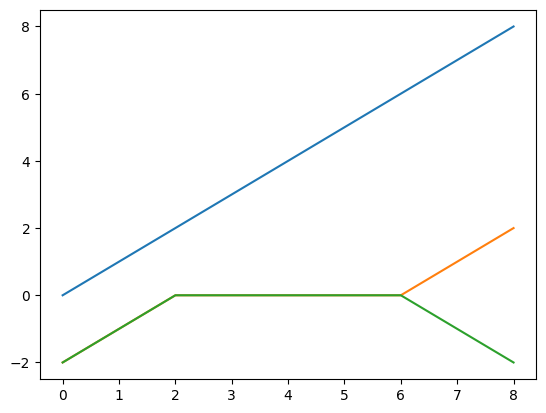

In [1]:
import torch
import matplotlib.pyplot as plt
T = torch.tensor([[0,1,2,3,4,5,6,7,8],[2,7,11,4,5,6,1,2,3]])

bound = [2.0,6.0]
T.clamp(bound[0], bound[1])

plt.plot(T[0,:])

plt.plot((T - T.clamp(bound[0], bound[1]))[0,:])
plt.plot(-torch.abs((T - T.clamp(bound[0], bound[1]))[0,:]))

In [16]:
num_envs = 64
_num_legs = 4
_number_predict_step = 1
_prevision_horizon = 3
device = 'cpu'

f = 1*torch.ones(num_envs, _num_legs, device=device)
d = 0.55*torch.ones(num_envs, _num_legs, device=device)
p_lw = torch.zeros(num_envs, _num_legs, 3, _number_predict_step, device=device)
p_rl = torch.zeros(num_envs, _num_legs, 3, _number_predict_step, device=device) # Used to compute penalty term
F_lw = torch.zeros(num_envs, _num_legs, 3, _prevision_horizon, device=device)
z = [f, d, p_lw, F_lw]

actions = torch.randn(num_envs, sum(variable.shape[1:].numel() for variable in z), device=device)
print(actions.shape)

print(sum(variable.shape[1:].numel() for variable in z)) 
print()

for variable in z:
    print(variable.shape[1:].numel())
    print(variable.shape)
print()

f = actions[:, 0 : f.shape[1:].numel()]
d = actions[:, f.shape[1:].numel() : f.shape[1:].numel() + d.shape[1:].numel()]
p_lw = actions[:, f.shape[1:].numel() + d.shape[1:].numel() : f.shape[1:].numel() + d.shape[1:].numel() + p_lw.shape[1:].numel()].reshape_as(p_lw)
F_lw = actions[:, f.shape[1:].numel() + d.shape[1:].numel() + p_lw.shape[1:].numel() : f.shape[1:].numel() + d.shape[1:].numel() + p_lw.shape[1:].numel() + F_lw.shape[1:].numel()].reshape_as(F_lw)

z = [f, d, p_lw, F_lw]
for variable in z:
    print(variable.shape[1:].numel())
    print(variable.shape)
print()


torch.Size([64, 56])
56

4
torch.Size([64, 4])
4
torch.Size([64, 4])
12
torch.Size([64, 4, 3, 1])
36
torch.Size([64, 4, 3, 3])

4
torch.Size([64, 4])
4
torch.Size([64, 4])
12
torch.Size([64, 4, 3, 1])
36
torch.Size([64, 4, 3, 3])



In [7]:
import torch

a = torch.randn(10,4)
b = torch.sum(a, dim=1)
c = torch.randn(10,3,5)
print(b.shape)
print(c.shape)
b.unsqueeze(-1).unsqueeze(-1)*c


torch.Size([10])
torch.Size([10, 3, 5])


tensor([[[ 4.3365e-01,  9.6838e-01, -1.8004e+00,  3.1203e+00,  1.1875e+00],
         [ 1.1013e+00, -5.6833e+00,  1.5057e+00, -3.8912e+00, -2.6385e+00],
         [ 9.3424e-01,  9.9264e-01, -2.3082e+00, -1.3657e+00,  6.7267e-01]],

        [[-1.9442e-01, -3.4300e-01,  7.8670e-02, -5.7622e-01,  9.1210e-02],
         [-5.3612e-01, -2.1279e-01, -2.2476e-01, -1.4254e-01, -2.1596e-03],
         [ 3.2512e-02,  1.7837e-01,  2.4883e-01, -2.8350e-01,  5.2160e-01]],

        [[-4.2796e-01,  4.9321e+00,  3.3061e+00,  1.8717e+00, -9.5266e-01],
         [-1.7079e+00, -7.3135e-01, -1.7175e+00,  1.8330e+00, -2.6230e+00],
         [-2.7789e+00,  1.1727e+00,  3.2427e+00, -1.6299e+00,  1.7539e+00]],

        [[ 2.5066e+00, -6.2748e+00,  5.5286e+00, -1.2821e+01,  1.4550e-02],
         [-5.8101e-01, -1.6196e-01,  1.8136e+00,  8.8238e+00,  1.9647e-01],
         [-1.8229e+00,  2.2025e+00,  4.6450e+00,  6.7667e+00,  2.1184e+00]],

        [[ 8.8243e-01,  1.2052e-01, -9.6759e-01, -1.8618e-01, -2.2502e-01],
    

In [1]:
import torch

# Example dimensions
b = 2
n = 3

# Example tensors p and p_prev of dimension (b, n, 3)
p = torch.randn(b, n, 3)
p_prev = torch.randn(b, n, 3)

# Calculate the squared difference and sum along the last dimension
squared_difference_sum = torch.sum(torch.square(p - p_prev), dim=-1)

# Verify the output shape
print("Output shape:", squared_difference_sum.shape)  # Output: (b,)


Output shape: torch.Size([2, 3])


In [12]:
import torch

# Example usage
batch_size = 10
grid_size = 18
n = 4

# Dummy sensor_data and index tensors
sensor_data = torch.rand(batch_size, grid_size, 3)
index = torch.randint(0, grid_size, (batch_size, n))

# Retrieve data in a single flow using advanced indexing
retrieved_data = sensor_data[torch.arange(batch_size).unsqueeze(1), index, 2]

print(retrieved_data.shape)  # Output: torch.Size([2, 3, 3])

torch.arange(batch_size).unsqueeze(1)
index

print(sensor_data[2,:,2])
print(index[2,:])
print(retrieved_data[2,:])

torch.Size([10, 4])
tensor([0.2023, 0.0271, 0.8369, 0.7345, 0.4740, 0.3796, 0.0417, 0.9282, 0.0021,
        0.3301, 0.4110, 0.2978, 0.8927, 0.6978, 0.5533, 0.6596, 0.4820, 0.2477])
tensor([ 4, 15, 11, 17])
tensor([0.4740, 0.6596, 0.2978, 0.2477])


In [2]:
import torch

torch.empty(1)

tensor([0.0059])

In [5]:
import torch 
from torch.distributions.constraints import real

a = torch.randn((4096,183,3))

a[1,2,:18]

a[0,0,0] = torch.nan
a[3514, 17, 2] = torch.nan

torch.isreal(a).all()

(a == a) # Fail for Nan

if not real.check(a).all() :
    print('not all are real, there is a nan')

torch.nonzero(~real.check(a))

not all are real, there is a nan


tensor([[   0,    0,    0],
        [3514,   17,    2]])

In [6]:
import torch 

F = torch.randn((16,4,3))

print(F[:,:,:].shape)
print(F[:,:,:2].shape)

F[0,0,0] = 10
print('10',F[0,0,0])

F = F.clamp(min=0)
print('10',F[0,0,0])

F[0,0,0] = -10
print('-10',F[0,0,0])

F = F.clamp(min=0)
print('0',F[0,0,0])

torch.Size([16, 4, 3])
torch.Size([16, 4, 2])
10 tensor(10.)
10 tensor(10.)
-10 tensor(-10.)
0 tensor(0.)


In [2]:
import torch

torch.randint(0, 1, (20,))

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
import torch
import argparse
# from __future__ import print_function
from torch.utils.data import Dataset, DataLoader
from dataloader import ObservationActionDataset, ChunkedObservationActionDataset
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR


# Load the dataset
# dataset = ChunkedObservationActionDataset('dataset/aliengo_model_based_speed/mcQueenOne/training_data_chunk_*.pt')
dataset = ObservationActionDataset('dataset/aliengo_model_based_speed/mcQueenFour/training_data.pt')
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


# Define model
class Model1(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model1, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)
    
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.lin1 = nn.Linear(input_size, 512)
        self.lin2 = nn.Linear(512, 256)
        self.lin3 = nn.Linear(256, 128)
        self.lin4 = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.lin1(x)
        x = F.elu(x)
        x = self.lin2(x)
        x = F.elu(x)
        x = self.lin3(x)
        x = F.elu(x)
        x = self.lin4(x)
        return x

# Example model definition
input_size = dataset.observations.shape[-1]
output_size = dataset.actions.shape[-1]
model = Model(input_size, output_size).cuda()

print('Input  Size : ', dataset.observations.shape)
print('Output Size : ', dataset.actions.shape)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for obs_batch, action_batch in dataloader:
        obs_batch, action_batch = obs_batch.cuda(), action_batch.cuda()  # Move to GPU
        optimizer.zero_grad()
        outputs = model(obs_batch)
        loss = criterion(outputs, action_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


print('Training completed.')

In [48]:
import torch
import time

# Assuming B is your input tensor
B = torch.empty(1000,1000,100)

# Timing the first approach
start_time = time.time()
A1 = (torch.rand_like(B, device='cuda') > 0.75).float()
time1 = time.time() - start_time

# Timing the second approach
start_time = time.time()
A2 = torch.bernoulli(torch.full_like(B, 0.25, device='cuda'))
time2 = time.time() - start_time

print("Time for the first approach (rand_like and comparison):", time1)
print("Time for the second approach (bernoulli and full_like):", time2)

print(A1)


Time for the first approach (rand_like and comparison): 0.00036716461181640625
Time for the second approach (bernoulli and full_like): 0.0001862049102783203
tensor([[[0., 0., 1.,  ..., 0., 1., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 1.]],

        [[1., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 1., 0., 0.],
         [0., 1., 1.,  ..., 1., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 1.,  ..., 0., 0., 1.]],

        ...,

        [[1., 0., 0.,  ..., 0., 0., 0.],
  

In [10]:
import torch
import time

# Example tensor F and parameters
F = torch.rand(1000, 1000, 3, 10, device='cuda')  # Change dimensions as needed
alpha = torch.tensor(0.5, device='cuda')
F_xy_max = torch.rand(1000,1000,10, device='cuda')
iter=10000

# Measure time for clamp_max
start_time = time.time()
for _ in range(iter):
    F_x_clipped_1 = F[:,:,0,:].clamp_max(torch.cos(alpha) * F_xy_max)
    alpha = torch.rand_like(alpha)
time_clamp_max = time.time() - start_time

# Measure time for torch.min
start_time = time.time()
for _ in range(iter):
    F_x_clipped_2 = torch.min(F[:,:,0,:], torch.cos(alpha) * F_xy_max)
    alpha = torch.rand_like(alpha)
time_torch_min = time.time() - start_time

print("Time for clamp_max:", time_clamp_max)
print("Time for torch.min:", time_torch_min)


Time for clamp_max: 7.128642320632935
Time for torch.min: 7.307240962982178


In [33]:
import torch
import time

device = 'cpu'

# Define the functions
def compute_tracking_error_original(target_height, robot_height, upper_bound, lower_bound):
    raw_error = target_height - robot_height
    tracking_error = torch.where(
        robot_height > target_height + upper_bound,
        raw_error - upper_bound,
        torch.where(
            robot_height < target_height - lower_bound,
            raw_error + lower_bound,
            torch.zeros_like(raw_error)
        )
    )
    return tracking_error

def compute_tracking_error_two_step(target_height, robot_height, upper_bound, lower_bound):
    raw_error = target_height - robot_height
    upper_bound_error = torch.where(robot_height > target_height + upper_bound, raw_error - upper_bound, raw_error)
    tracking_error = torch.where(robot_height < target_height - lower_bound, raw_error + lower_bound, upper_bound_error)
    tracking_error = torch.where((robot_height >= target_height - lower_bound) & (robot_height <= target_height + upper_bound), torch.zeros_like(tracking_error), tracking_error)
    return tracking_error

def compute_tracking_error_indexing(target_height, robot_height, upper_bound, lower_bound):
    raw_error = target_height - robot_height
    tracking_error = raw_error.clone()
    tracking_error[robot_height > target_height + upper_bound] -= upper_bound
    tracking_error[robot_height < target_height - lower_bound] += lower_bound
    within_bounds = (robot_height >= target_height - lower_bound) & (robot_height <= target_height + upper_bound)
    tracking_error[within_bounds] = 0
    return tracking_error

# Initialize tensors
batch_size = 4096
num=1000
target_height = torch.tensor([10.0] * batch_size, device=device)
robot_height = torch.tensor([8.0] * batch_size, device=device)
upper_bound = torch.tensor([2.0], device=device)
lower_bound = torch.tensor([2.0], device=device)

# Benchmark original
start_time = time.time()
for i in range(num): tracking_error1 = compute_tracking_error_original(target_height, robot_height, upper_bound, lower_bound)
end_time = time.time()
print("Original implementation time:", end_time - start_time)

# Benchmark two-step
start_time = time.time()
for i in range(num): tracking_error2 = compute_tracking_error_two_step(target_height, robot_height, upper_bound, lower_bound)
end_time = time.time()
print("Two-step implementation time:", end_time - start_time)

# Benchmark indexing
start_time = time.time()
for i in range(num): tracking_error3 = compute_tracking_error_indexing(target_height, robot_height, upper_bound, lower_bound)
end_time = time.time()
print("Indexing implementation time:", end_time - start_time)

print(((tracking_error1-tracking_error2) > 1e-10).any())
print(((tracking_error1-tracking_error3) > 1e-10).any())
print(((tracking_error2-tracking_error3) > 1e-10).any())


Original implementation time: 0.036420583724975586
Two-step implementation time: 0.05660271644592285
Indexing implementation time: 0.084747314453125
tensor(False)
tensor(False)
tensor(False)


In [52]:

height_bound = (-0.1, +0.1)

target_height = torch.tensor((0.5, 0.5, 0.5, 0.5, 0.5))
robot_height_prop = torch.tensor((0.5, 0.4, 0.6, 0.3, 0.7))


# Compute the tracking error
tracking_error = robot_height_prop - target_height
print(tracking_error)
# If tolerance bound are provided adjusted error with bounds
if height_bound is not None :

    tracking_error = torch.where(
        robot_height_prop > target_height + height_bound[1],
        tracking_error - height_bound[1],
        torch.where(
            robot_height_prop < target_height + height_bound[0],
            tracking_error - height_bound[0],
            torch.zeros_like(tracking_error)
        )
    )

tracking_error


tensor([ 0.0000, -0.1000,  0.1000, -0.2000,  0.2000])


tensor([ 0.0000,  0.0000,  0.0000, -0.1000,  0.1000])

In [12]:
import torch
import itertools
import time

# Example tensor (batch, legs, 2)
batch = 40960
legs = 4
foot_xy_pos = torch.rand((batch, legs, 2))

# Full pairwise distance computation
def full_pairwise_distances(foot_xy_pos):
    foot_exp1 = foot_xy_pos.unsqueeze(2)
    foot_exp2 = foot_xy_pos.unsqueeze(1)
    diffs = foot_exp1 - foot_exp2
    distances = torch.norm(diffs, dim=-1)
    upper_triangle_distances = distances.triu(diagonal=1)
    return upper_triangle_distances

# Optimized upper triangular distance computation
def optimized_upper_triangular_distances(foot_xy_pos):
    indices = list(itertools.combinations(range(legs), 2))
    distances = []
    for i, j in indices:
        diff = foot_xy_pos[:, i, :] - foot_xy_pos[:, j, :]
        dist = torch.norm(diff, dim=1)
        distances.append(dist)
    distances = torch.stack(distances, dim=1)
    return distances

# Benchmarking function
def benchmark(func, foot_xy_pos, iterations=1000):
    start_time = time.time()
    for _ in range(iterations):
        result = func(foot_xy_pos)
    end_time = time.time()
    return end_time - start_time, result

# Run benchmarks
iterations = 1
time_full, result_full = benchmark(full_pairwise_distances, foot_xy_pos, iterations)
time_optimized, result_optimized = benchmark(optimized_upper_triangular_distances, foot_xy_pos, iterations)

# Print results
print(f"Full pairwise distances time: {time_full:.6f} seconds")
print(f"Optimized upper triangular distances time: {time_optimized:.6f} seconds")

# Validate that results are equivalent
# Extract the upper triangular part (excluding the diagonal) from the full pairwise distances
upper_triangle_indices = torch.triu_indices(legs, legs, 1)
result_full_upper = result_full[:, upper_triangle_indices[0], upper_triangle_indices[1]]
print(f"Are the results equivalent? {torch.allclose(result_full_upper, result_optimized)}")

result_optimized[0]


Full pairwise distances time: 0.003140 seconds
Optimized upper triangular distances time: 0.001984 seconds
Are the results equivalent? True


tensor([0.9345, 0.5352, 0.7688, 0.4836, 0.6719, 0.7495])